##### In this notebook, I created a Logistic Regression model for predicting the heart disease cases of the patients with given attributes. I choose logistic regression for this problem because it is easier to implement, interpret, and very efficient to train.

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the data from a .csv in the same folder
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Checking the descriptives
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We don't have any missing values in the dataset.

### Dealing with outliers

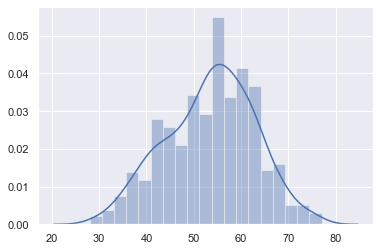

In [5]:
# The distrubition of values will show us that if there are any anomalies, such as outliers
sns.distplot(df[["Age"]])


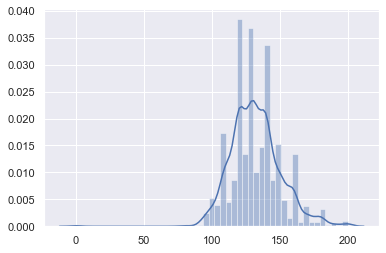

In [6]:
sns.distplot(df[["RestingBP"]])

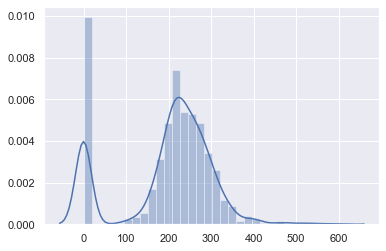

In [7]:
sns.distplot(df[["Cholesterol"]])

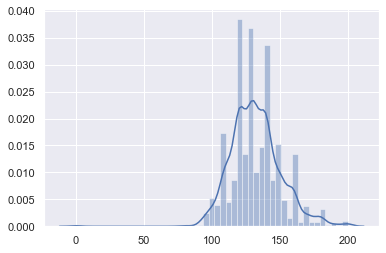

In [8]:
sns.distplot(df[["RestingBP"]])

C:\Users\Serdest\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


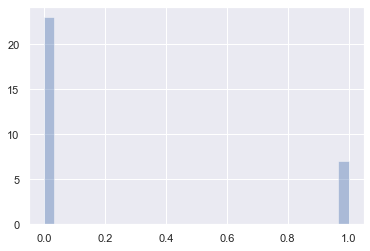

In [9]:
sns.distplot(df[["FastingBS"]])

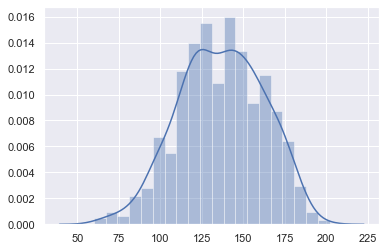

In [10]:
sns.distplot(df[["MaxHR"]])

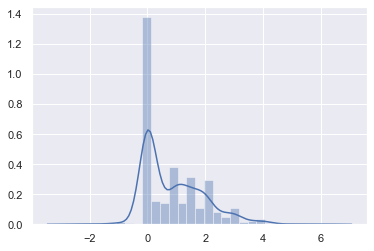

In [11]:
sns.distplot(df[["Oldpeak"]])

As we can see, variables of the given dataset are normal distrubuted within the specified range except some outliers.

In [12]:
# I'm going to remove very small numbers of RestingBP from the dataset.
# The data that less than %99 of this feature will be removed.
q = df['RestingBP'].quantile(0.01)
df_cleaned = df[df['RestingBP']>q]

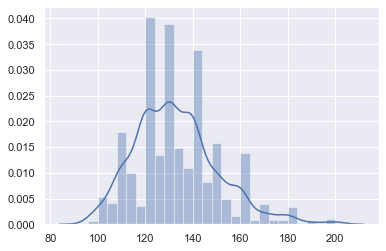

In [13]:
sns.distplot(df_cleaned[["RestingBP"]])

In [14]:
# Cholesterol in human body can't be 0 so I'm going to remove these values.
df_cleaned = df[df["Cholesterol"]>0]

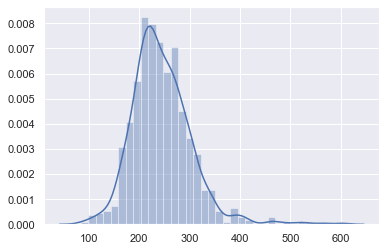

In [15]:
sns.distplot(df_cleaned[["Cholesterol"]])

Now it's better

In [16]:
df_cleaned.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
# Let's reset the index values 
df_cleaned = df_cleaned.reset_index()

In [18]:
# Dropping the old index column
df_cleaned.drop("index",axis = 1, inplace=True)

We nearly removed 150 row from the data which is a reasonable value.

### Rearrange Binary Features

In [19]:
# Categorical variables like ExerciseAngina or Sex can also be written in binary form.
df_cleaned.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
df_cleaned["Sex"] = df_cleaned["Sex"].map({"M":0,"F":1})
df_cleaned["ExerciseAngina"] = df_cleaned["ExerciseAngina"].map({"N":0,"Y":1})

### Create Dummy Variables

In [21]:
# We need dummy variables for ChestPainType, RestingECG and these type of features
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(df_cleaned,drop_first=True)
data_with_dummies

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,0,110,264,0,132,0,1.2,1,0,0,1,1,0,1,0
742,68,0,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0
743,57,0,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0
744,57,1,130,236,0,174,0,0.0,1,1,0,0,0,0,1,0


In [22]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'], dtype=object)

In [23]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['HeartDisease','Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']

In [24]:
data = data_with_dummies[cols]
data

,HeartDisease,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0,40,0,140,289,0,172,0,0.0,1,0,0,1,0,0,1
1,1,49,1,160,180,0,156,0,1.0,0,1,0,1,0,1,0
2,0,37,0,130,283,0,98,0,0.0,1,0,0,0,1,0,1
3,1,48,1,138,214,0,108,1,1.5,0,0,0,1,0,1,0
4,0,54,0,150,195,0,122,0,0.0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,1,45,0,110,264,0,132,0,1.2,0,0,1,1,0,1,0
742,1,68,0,144,193,1,141,0,3.4,0,0,0,1,0,1,0
743,1,57,0,130,131,0,115,1,1.2,0,0,0,1,0,1,0
744,1,57,1,130,236,0,174,0,0.0,1,0,0,0,0,1,0


## Regression model

### Declare the inputs and the targets

In [25]:
# The target (dependent variable) is 'Heart Disease'
targets = data["HeartDisease"]

# And the inputs are the rest
inputs = data.drop("HeartDisease",axis = 1)

### Scale the data

In [26]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# I'm going to create an scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [27]:
# Creating new input variable so we can do regression with them
scaled_inputs = scaler.transform(inputs)

### Train Test Split

In [28]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=42)

### Create the regression

In [29]:
# Import the module for the regression
from sklearn.linear_model import LogisticRegression
# We must use logistic regression because the desired output should be either 1 or 0.

# Create a regression object
log_reg = LogisticRegression()

# Fitted the regression with train data
log_reg.fit(x_train,y_train)

# Find the R-squared of the model
log_reg.score(x_train,y_train)

0.8590604026845637

### Confusion Matrix

In [30]:
from sklearn import metrics
y_pred = log_reg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[66,  5],
       [11, 68]], dtype=int64)

### Confusion Matrix Evaluation Metrics

In [31]:
# Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8933333333333333
Precision: 0.9315068493150684
Recall: 0.8607594936708861


## Receiver Operating Characteristic(ROC) 

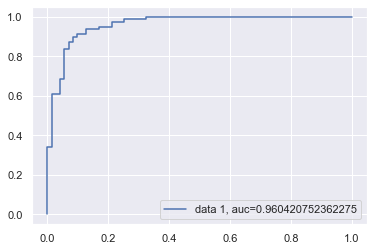

In [32]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Conclusion

As we can see we have decent accuracy and precision rates with very high auc score. We can easily say that the model fits very well with the given dataset.